#### Chain Of Thoughts With RAG

**What is Chain-of-Thought (CoT) in RAG?**

- Chain of Thought = private reasoning inside the LLM.

- Used to enhance answer quality, but nothing about CoT is actionable.

- It’s part of the forward pass of the LLM.

- LangGraph does not treat it as a step.

- You cannot schedule nodes based on CoT.

In [4]:
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
llm=init_chat_model("openai:gpt-4o")

In [5]:
from typing import TypedDict
from langgraph.graph import StateGraph
from langchain_openai import ChatOpenAI

class GraphState(TypedDict):
    question: str
    answer: str


In [14]:
def cot_reasoning_node(state: GraphState):
    llm = ChatOpenAI(model="gpt-4o-mini")

    # prompt = f"""
    # You are a highly intelligent AI.
    # Think step-by-step (chain of thought), but in the final answer,
    # ONLY return the final answer, not the reasoning.

    # Question: {state['question']}
    # """

    # if you want to see the reasoning of COT use the below prompt

    prompt = f"""
                Think step by step and show all your reasoning.
                Question: {state['question']}
                """


    result = llm.invoke(prompt)

    return {"answer": result.content}


In [15]:
graph = StateGraph(GraphState)

# Add the LLM reasoning node
graph.add_node("cot_reasoning", cot_reasoning_node)

# Only one node → directly return
graph.set_entry_point("cot_reasoning")
graph.set_finish_point("cot_reasoning")

app = graph.compile()


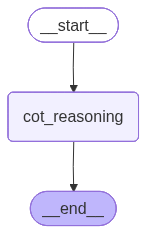

In [16]:
app

In [17]:
result = app.invoke({"question": "How does LangGraph differ from LangChain?"})
print(result["answer"])


To understand how LangGraph differs from LangChain, we need to break down both concepts step by step. 

### What is LangChain?

1. **Definition and Purpose**: 
   - LangChain is a framework designed for building applications with language models. 
   - It provides tools to create complex workflows, integrate with external APIs, and manage the state within applications.

2. **Core Components**:
   - **Chains**: Sequences of calls to language models or other computation functions.
   - **Agents**: Components that can take actions based on user input, including querying language models and making decisions.
   - **Memory**: Allows LangChain applications to remember past interactions with users to improve responses and provide context.

3. **Integrations**: 
   - LangChain supports various integrations such as document loaders, chat models, toolkits, and user interfaces.

### What is LangGraph?

1. **Definition and Purpose**: 
   - LangGraph appears to focus on representing language and in